# RULES FOR WRITING SOFTWARE, WITH EXAMPLES

This notebook describes and motivates the rules for writing software.

In [ ]:
import numpy as np
import pandas as pd

# Handling dependencies
You must ensure that any packages (dependencies) required for your code to run are installed.

Installing Tellurium
``!pip install -q tellurium``

Now we can import tellurium
``import tellurium as te``

In [ ]:
# First code cell in a notebook contains all installs
!pip install -q tellurium


In [ ]:
# Second code cell has all imports
import pandas as pd     # DataFrames and Series
import numpy as np      # Numerical methods
import tellurium as te  # Simulations

# Use functions instead of scripts
Whenever possible, use functions instead of scripts. 
This is because functions facilitate reuse, and functions are testable. 
Never use copy and paste for reuse

## Exercise
Write a script for an antimony model of $\$X \rightarrow A \rightarrow B \rightarrow \$Y$. All kinetics are mass action.

In [ ]:
model_str = """
$X -> A; k1
A ->B; k2*A
B -> $Y; k3*B

k1 =1
k2 =1
k3 = 1
X = 10
Y = 10
"""

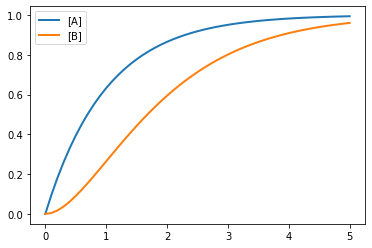

In [ ]:
def plot_model(model_str):
    """
    Creates a roadrunner object and plots the model.

    Parameters
    ----------
    model_str: str
    """
    rr = te.loada(model_str)
    data = rr.simulate()
    rr.plot(data)

# Smoke test
plot_model(model_str)

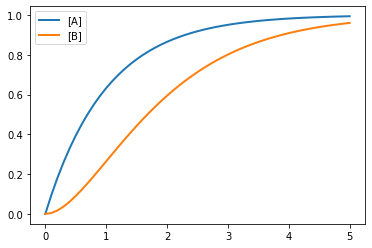

In [ ]:
# Provide for changing model parameters
def plot_model(model_str, dct={}):
    """
    Creates a roadrunner object and plots the model and allows
    the caller to change the model parameters.

    Parameters
    ----------
    model_str: str
    dct: dictionary
       key: parameter name
       value: parameter value
    """
    rr = te.loada(model_str)
    # Change model paramters
    for key in dct.keys():
        rr[key] = dct[key]
    # Do the simulation
    data = rr.simulate()
    rr.plot(data)

# Smoke test
plot_model(model_str, dict(k1=1))

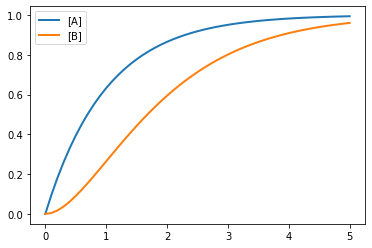

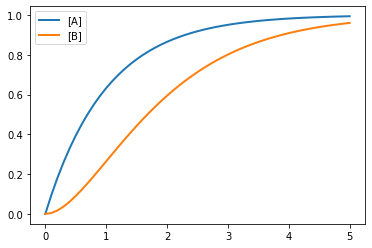

In [ ]:
# Use python optional keyward parameter -- **kwargs
# Provie for changing model parameters
def plot_model(model_str, **kwargs):
    """
    Creates a roadrunner object and plots the model and allows
    the caller to change the model parameters.

    Parameters
    ----------
    model_str: str
    kwargs: dictionary
       key: parameter name
       value: parameter value
    """
    rr = te.loada(model_str)
    # Change model paramters
    for key in kwargs.keys():
        rr[key] = kwargs[key]
    # Do the simulation
    data = rr.simulate()
    rr.plot(data)

# Smoke test
plot_model(model_str)
plot_model(model_str, k1=1)

In [ ]:
import numpy as np
# Script that tests if a number is prime
number = 12
is_prime = True
for factor in range(2, int(np.sqrt(number))):
    if number % factor == 0:
        is_prime = False
if is_prime:
    answer = "yes"
else:
    answer = "no"
print("Is %d prime? %s" % (number, answer))

Is 12 prime? no


## Why aren't scripts enough?

Testing the script is cumbersome -- must try and evaluate many values.

Difficult to reuse script. How embed this in code that prints the first $N$ prime numbers?

## Making a script into a function

Steps
1. Determine the interface - inputs and outputs
1. Write the ``def`` statement
1. Document the function
1. Copy the script into the function body.
1. Add the return statement.
1. Delete unneeded code (e.g., ``print``)

The above script can be made into the function ``checkPrime``.

In [ ]:
def checkPrime(number):
    """
    Determines if the number is a prime.
    
    Parameters
    ----------
    number: int
    
    Returns
    -------
    bool
    """
    is_prime = True
    for factor in range(2, int(np.sqrt(number)) + 1):
        if number % factor == 0:
            is_prime = False
    return is_prime

In [ ]:
answers = ["Yes", "No"]
number = 24
print("Is %d prime? %s" % (number, checkPrime(number)))

Is 24 prime? False


Now we can use ``checkPrime`` as a building block to create other functions.

In [ ]:
# Find the first N primes
def findPrimes(count):
    """
    Finds the count of primes indicated.
    
    Parameters
    ----------
    count: int
    
    Returns
    -------
    list-int
    """
    results = []
    number = 1
    while True:
        if len(results) >= count:
            break
        number += 1
        if checkPrime(number):
            results.append(number)
    return results

In [ ]:
findPrimes(10)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

# Names of variables and functions

Use meaningful names for functions are variables. Function names should be verbs. 
For example, a function that calculates a fast Fourier transform might be named calcFFT.
A bad name for this function would be the single letter f.

Why did we name the function ``checkPrimes`` instead of ``f``?

In [ ]:
# Re-write this function according the the rules for variable and function names.
# Show that you get the same result as the original code.
def p(n):
    r = 1
    for i in range(len(n)):
        r *= n[i]
    return r

In [ ]:
p([4, 3, 2])

24

# Use named constants
Constants used in the notebook should have a name in all capital letters. For example, use ``PI``, not ``pi``.
(By definition, a constant is a variable that is assigned a value only once.)
Named constants should also be used for dataframes.
For example, instead of ``df["mean"]`` use ``df[MEAN]``, where ``MEAN = "mean"`` appears elsewhere.

In [ ]:
MODEL = """
J0: $X -> A; k1
J1: A -> B; k2*A
X =10
A = 0
B = 0
k1 = 1
k2 =1
"""

In [ ]:
# Get data from running the simulation
rr = te.loada(MODEL)
data = rr.simulate(0, 5, 100, ["time", "[A]", "[B]", "J1"])
data_df = pd.DataFrame(data, columns = data.colnames)
data_df.head(2)

,time,[A],[B],J1
0,0.000000,0.000000,0.000000,0.000000
1,0.050505,0.049251,0.001254,0.049251


In [ ]:
# See that mass action kinetics are present
checks_ser = data_df["J1"] == data_df["[A]"]
checks_ser.head(3)

0    True
1    True
2    True
dtype: bool

In [ ]:
# Check the mass action rate law for J1
assert(sum(data_df["J1"] == data_df["[A]"]) == len(data_df))

# Document your functions

After the function definition, you should have comment lines that specify:
* What the function does
* The data types of each input and output (including names of columns if an input is a dataframe) 


# Functions must have tests

You must have at least one test for each function that shows that the major code paths work correctly.
In a Jupyter notebook, the tests should follow the function definition in the code cell in which the function is defined.
The test will use the python assert statement to evaluate a boolean condition that constitutes the test.
For python modules, you will create a separate test file that uses the python unittest framework.

# Example 